# FL
* Fish Lake Small Domain
## All Plots Together Here

Created new env: From *rasterio*, a copy of that to install rioxarray, now *rasterio_copy*


In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats

In [2]:
# sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size
# plt.rcParams['figure.figsize'] = [10,10] #overriding size

In [3]:
!conda env list

# conda environments:
#
base                     C:\Users\Lumbr\miniconda3
raster                   C:\Users\Lumbr\miniconda3\envs\raster
rasterio                 C:\Users\Lumbr\miniconda3\envs\rasterio
rasterio_copy         *  C:\Users\Lumbr\miniconda3\envs\rasterio_copy
unload                   C:\Users\Lumbr\miniconda3\envs\unload



In [4]:
# labels and cosntants 
# titles
title = 'Fish Lake'

# labels 
dce_label = 'distance to canopy edge (m)'
dah_label = 'diurnal anisotropic heat index'
slope_label = 'slope (degrees)'
aspect_label = 'aspect (degrees)'
snow_label = 'snow depth (m)'

dceclassdict = {1: 'Large Clusters', 2: 'Small Clusters', 3: 'Edges', 4: 'Small Gaps', 5: 'Large Gaps'}

In [5]:
ds = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/fl_smalldomain_create_netcdf.nc')
ds

<xarray.Dataset>
Dimensions:                         (x: 3725, y: 3330, band: 1)
Coordinates:
  * x                               (x) float64 1.492e+06 ... 1.503e+06
  * y                               (y) float64 8.058e+05 ... 7.958e+05
  * band                            (band) int32 1
Data variables: (12/33)
    snowdepth                       (band, y, x) float32 ...
    dem                             (band, y, x) float32 ...
    chm                             (band, y, x) float32 ...
    aspect                          (band, y, x) float32 ...
    slope                           (band, y, x) float32 ...
    dce                             (band, y, x) float32 ...
    ...                              ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...
    spatial_ref                     int32 ...

In [6]:
# flatten everything to save time later
chm_flat=ds.chm.values.flatten()
dce_flat=ds.dce.values.flatten()
dce_reclass_flat=ds.dce_reclass.values.flatten()

dah_flat=ds.dah.values.flatten()
dah_reclass_flat=ds.dah_reclass.values.flatten()

snowdepth_flat=ds.snowdepth.values.flatten()
dem_flat=ds.dem.values.flatten()
tpi_flat=ds.tpi.values.flatten()

slope_flat=ds.slope.values.flatten()
aspect_flat=ds.aspect.values.flatten()

dce_dahpos_reclass_flat=ds.dce_dahpos_reclass.values.flatten()
dce_dahneg_reclass_flat=ds.dce_dahneg_reclass.values.flatten()

### not sure that I need this code anymore... 

In [7]:
# # Make groups for dce classifications
# # setting to larger values outside of distance ranges to avoid overwriting 
# largeclusters = ds.where(ds.dce_reclass == 100)
# smallclusters = ds.where(ds.dce_reclass == 200)
# canopyedges   = ds.where(ds.dce_reclass == 300)
# smallgaps     = ds.where(ds.dce_reclass == 400)
# largegaps     = ds.where(ds.dce_reclass == 500)

# # Make groups for dah classification 
# dahpos = ds.where(ds.dah_reclass ==  1)
# dahneg = ds.where(ds.dah_reclass == -1)

# # Flatten and remove nans -----------------------------------------------------------------------
# # dce
# largeclusters_flat = largeclusters.snowdepth.values.flatten()
# smallclusters_flat = smallclusters.snowdepth.values.flatten()
# canopyedges_flat   = canopyedges.snowdepth.values.flatten()
# smallgaps_flat     = smallgaps.snowdepth.values.flatten()
# largegaps_flat     = largegaps.snowdepth.values.flatten()

# largeclusters_flat = largeclusters_flat[~(np.isnan(largeclusters_flat))] # removing the nans 
# smallclusters_flat = smallclusters_flat[~(np.isnan(smallclusters_flat))]
# canopyedges_flat   = canopyedges_flat[~(np.isnan(canopyedges_flat))]
# smallgaps_flat     = smallgaps_flat[~(np.isnan(smallgaps_flat))]
# largegaps_flat     = largegaps_flat[~(np.isnan(largegaps_flat))]

# # dah
# dahpos_flat     = dahpos.snowdepth.values.flatten()
# dahpos_flat     = dahpos_flat[~(np.isnan(dahpos_flat))]

# dahneg_flat     = dahneg.snowdepth.values.flatten()
# dahneg_flat     = dahneg_flat[~(np.isnan(dahneg_flat))]



# # For pos vs neg groups -----------------------------------------------------------------------
# # first set the values for each of the two pos and neg datasets 
# largeclusters_dahpos = ds.where(ds.dce_dahpos_reclass == 100)
# smallclusters_dahpos = ds.where(ds.dce_dahpos_reclass == 200)
# canopyedges_dahpos   = ds.where(ds.dce_dahpos_reclass == 300)
# smallgaps_dahpos     = ds.where(ds.dce_dahpos_reclass == 400)
# largegaps_dahpos     = ds.where(ds.dce_dahpos_reclass == 500)

# largeclusters_dahneg = ds.where(ds.dce_dahneg_reclass == 100)
# smallclusters_dahneg = ds.where(ds.dce_dahneg_reclass == 200)
# canopyedges_dahneg   = ds.where(ds.dce_dahneg_reclass == 300)
# smallgaps_dahneg     = ds.where(ds.dce_dahneg_reclass == 400)
# largegaps_dahneg     = ds.where(ds.dce_dahneg_reclass == 500)


# # For pos vs neg groups 
# # dce pos dah
# largeclusters_dahpos_flat = largeclusters_dahpos.snowdepth.values.flatten()
# smallclusters_dahpos_flat = smallclusters_dahpos.snowdepth.values.flatten()
# canopyedges_dahpos_flat   = canopyedges_dahpos.snowdepth.values.flatten()
# smallgaps_dahpos_flat     = smallgaps_dahpos.snowdepth.values.flatten()
# largegaps_dahpos_flat     = largegaps_dahpos.snowdepth.values.flatten()

# largeclusters_dahpos_flat = largeclusters_dahpos_flat[~(np.isnan(largeclusters_dahpos_flat))] # removing the nans 
# smallclusters_dahpos_flat = smallclusters_dahpos_flat[~(np.isnan(smallclusters_dahpos_flat))]
# canopyedges_dahpos_flat   = canopyedges_dahpos_flat[~(np.isnan(canopyedges_dahpos_flat))]
# smallgaps_dahpos_flat     = smallgaps_dahpos_flat[~(np.isnan(smallgaps_dahpos_flat))]
# largegaps_dahpos_flat     = largegaps_dahpos_flat[~(np.isnan(largegaps_dahpos_flat))]

# # dce neg dah
# largeclusters_dahneg_flat = largeclusters_dahneg.snowdepth.values.flatten()
# smallclusters_dahneg_flat = smallclusters_dahneg.snowdepth.values.flatten()
# canopyedges_dahneg_flat   = canopyedges_dahneg.snowdepth.values.flatten()
# smallgaps_dahneg_flat     = smallgaps_dahneg.snowdepth.values.flatten()
# largegaps_dahneg_flat     = largegaps_dahneg.snowdepth.values.flatten()

# largeclusters_dahneg_flat = largeclusters_dahneg_flat[~(np.isnan(largeclusters_dahneg_flat))] # removing the nans 
# smallclusters_dahneg_flat = smallclusters_dahneg_flat[~(np.isnan(smallclusters_dahneg_flat))]
# canopyedges_dahneg_flat   = canopyedges_dahneg_flat[~(np.isnan(canopyedges_dahneg_flat))]
# smallgaps_dahneg_flat     = smallgaps_dahneg_flat[~(np.isnan(smallgaps_dahneg_flat))]
# largegaps_dahneg_flat     = largegaps_dahneg_flat[~(np.isnan(largegaps_dahneg_flat))]

## Plot

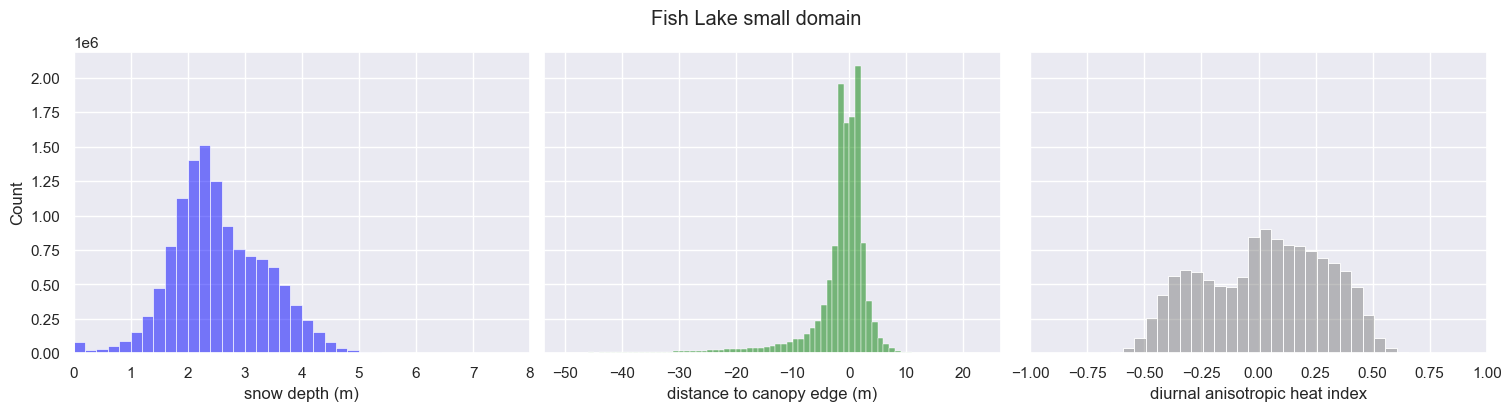

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha = 0.5

fig.suptitle('Fish Lake small domain')

sns.histplot(ax=axes[0], data=snowdepth_flat, label='snow depth', color='blue', alpha=alpha, binwidth=0.2, kde=False) # bin 20 cm? 
sns.histplot(ax=axes[1], data=dce_flat,       label='dce', color='green', alpha=alpha, binwidth=1, kde=False) # bin 1 meter? 
sns.histplot(ax=axes[2], data=dah_flat,       label='dah', color='grey', alpha=alpha, binwidth=.05, kde=False) # bin 1 meter? 

axes[0].set_xlim([0,8])
# axes[1].set_xlim([-20,20])
axes[2].set_xlim([-1,1])

axes[0].set_xlabel(snow_label)
axes[1].set_xlabel(dce_label)
axes[2].set_xlabel(dah_label)

plt.show()

## Matrix

In [8]:
# create df 
df = pd.DataFrame({'snowdepth': snowdepth_flat,
                   'dem': dem_flat, 
                   'dah': dah_flat, 
                   'tpi': tpi_flat, 
                   'dce': dce_flat})

# random forest cannot have any na values
# df.snowdepth.dropna(inplace=True)
# df.dropna(how='any', inplace=True) # it has to be everything 

df

snowdepth          dem       dah       tpi        dce
0          2.346350  1059.557739 -0.372325 -0.414999   2.865120
1          2.106960  1059.616943 -0.388228 -0.224788   3.779520
2          2.102942  1059.631104 -0.376725 -0.063017   4.612640
3          1.987302  1059.633911 -0.338724  0.086105   4.876800
4          2.082329  1059.525513 -0.250987  0.124331   4.754880
...             ...          ...       ...       ...        ...
12404245   1.388864  1090.113770  0.175517  0.386416 -13.065761
12404246   1.147763  1090.402466  0.183025  0.411192 -12.801600
12404247   1.066130  1090.658936  0.204877  0.400543 -12.801600
12404248   1.059433  1090.907715  0.222339  0.380389 -12.760961
12404249   1.099914  1091.125610  0.232873  0.354634 -12.496800

[12404250 rows x 5 columns]

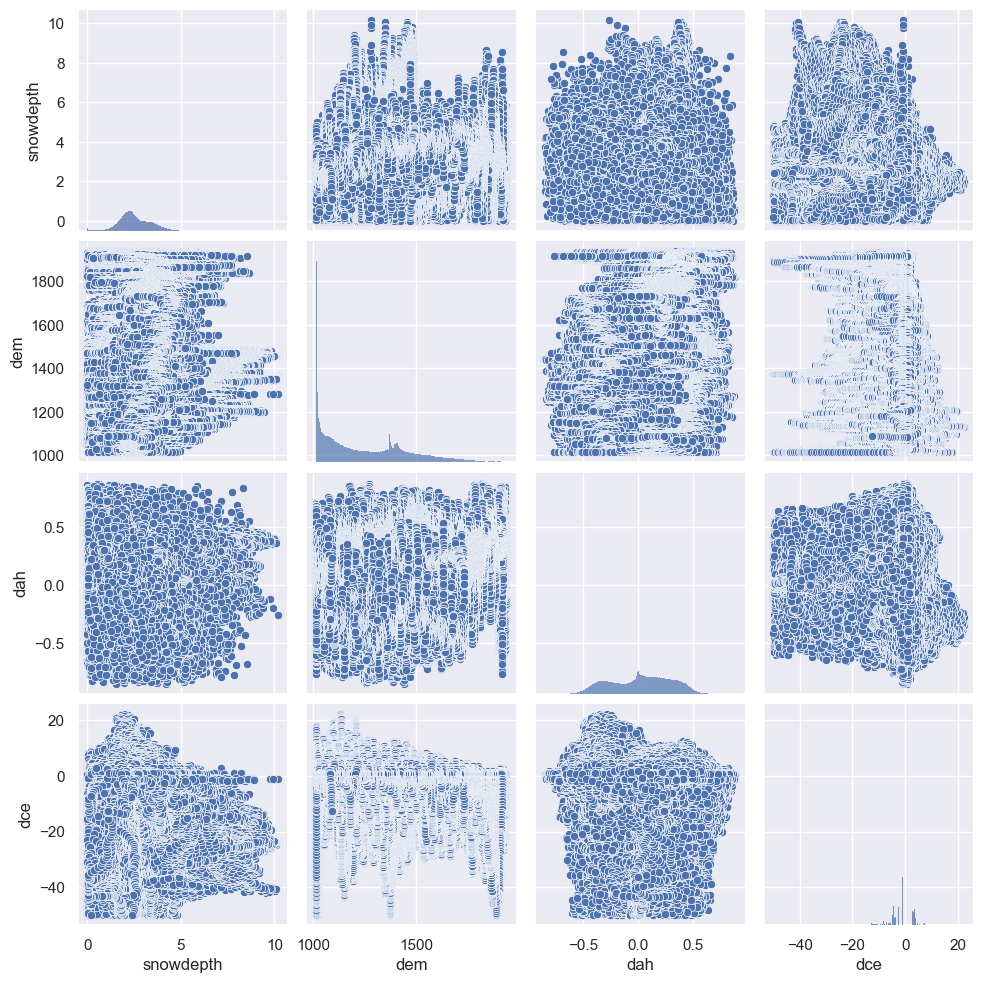

In [12]:
# sns.pairplot(df)

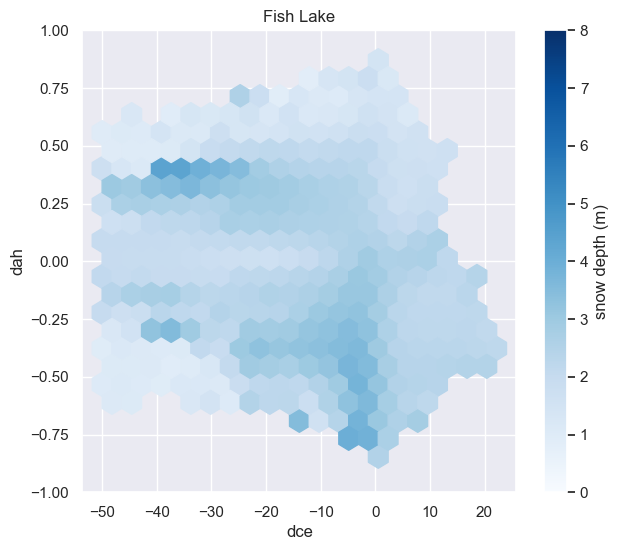

In [25]:
plt.figure(figsize=(7,6))

plt.hexbin(dce_flat, dah_flat, C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          gridsize=20, mincnt=2)

cb = plt.colorbar()
cb.set_label('snow depth (m)')

plt.xlabel('dce')
plt.ylabel('dah')
# plt.xlim([-20,20])
plt.ylim([-1,1])

plt.title('Fish Lake')
plt.show()

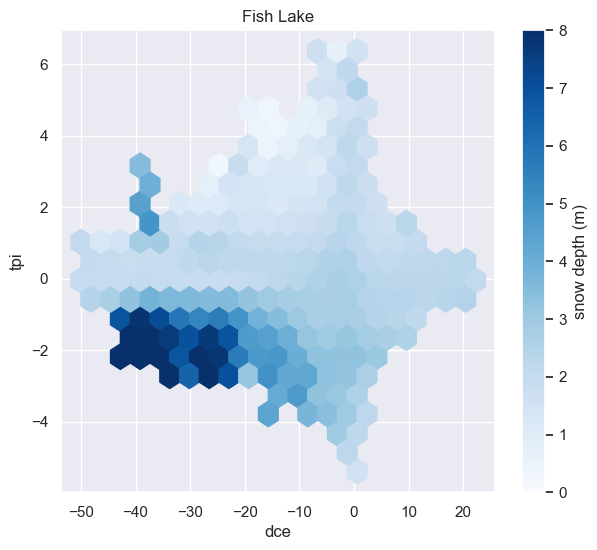

In [9]:
plt.figure(figsize=(7,6))

plt.hexbin(dce_flat, tpi_flat, C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          gridsize=20, mincnt=2)

cb = plt.colorbar()
cb.set_label('snow depth (m)')

plt.xlabel('dce')
plt.ylabel('tpi')
# plt.xlim([-20,20])
# plt.ylim([-1,1])

plt.title('Fish Lake')
plt.show()

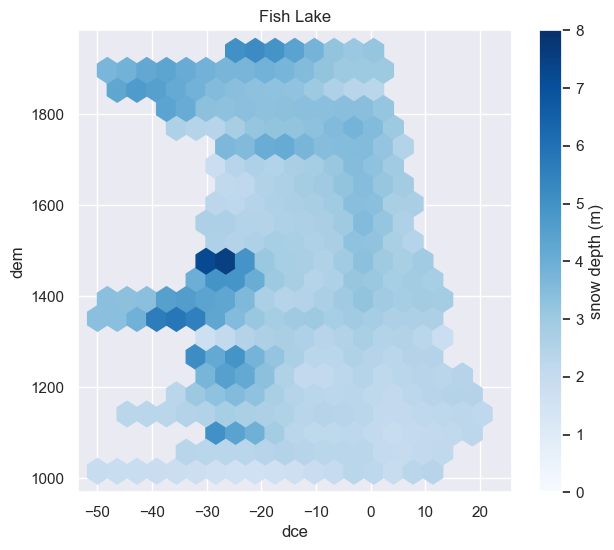

In [23]:
plt.figure(figsize=(7,6))

plt.hexbin(dce_flat, dem_flat, C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          gridsize=20, mincnt=2)

cb = plt.colorbar()
cb.set_label('snow depth (m)')

plt.xlabel('dce')
plt.ylabel('dem')
# plt.xlim([-20,20])
# plt.ylim([-1,1])

plt.title('Fish Lake')
plt.show()

## Other Plots

In [11]:
ds

<xarray.Dataset>
Dimensions:                         (x: 3725, y: 3330, band: 1)
Coordinates:
  * x                               (x) float64 1.492e+06 ... 1.503e+06
  * y                               (y) float64 8.058e+05 ... 7.958e+05
  * band                            (band) int32 1
Data variables: (12/30)
    snowdepth                       (band, y, x) float32 2.346 2.107 ... 1.1
    dce                             (band, y, x) float32 2.865 3.78 ... -12.5
    dem                             (band, y, x) float32 1.06e+03 ... 1.091e+03
    tpi                             (band, y, x) float32 -0.415 ... 0.3546
    dah                             (band, y, x) float32 -0.3723 ... 0.2329
    dah_reclass                     (band, y, x) float32 -1.0 -1.0 ... 1.0 1.0
    ...                              ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...
    spatial_ref                     int32 ...

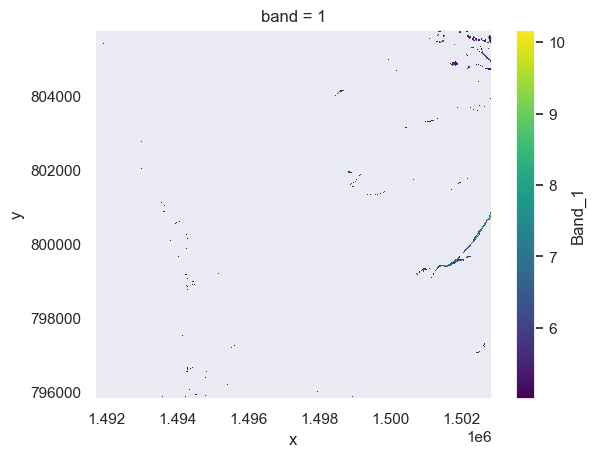

In [101]:
(ds.snowdepth.where(ds.snowdepth > 5)).plot()

In [96]:
ds['chmas'] = ds['chm'] - ds['snowdepth']

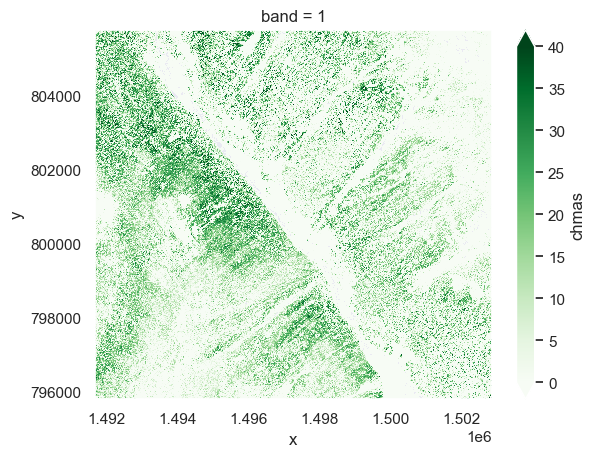

In [99]:
ds.chmas.plot(cmap='Greens', vmin=0, vmax=40)

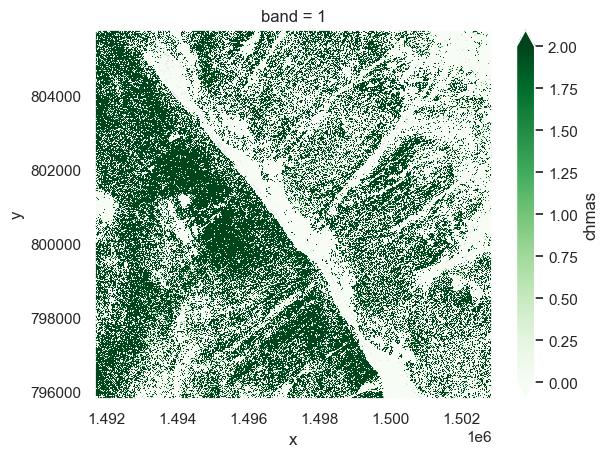

In [102]:
ds.chmas.plot(cmap='Greens', vmax=2, vmin=0)

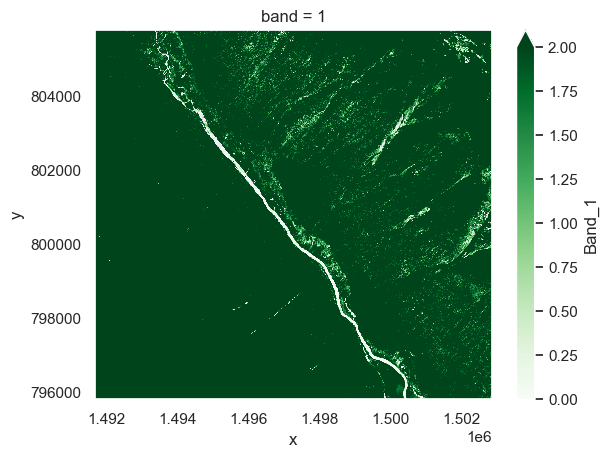

In [95]:
ds.chm.plot(cmap='Greens', vmax=2, vmin=0)

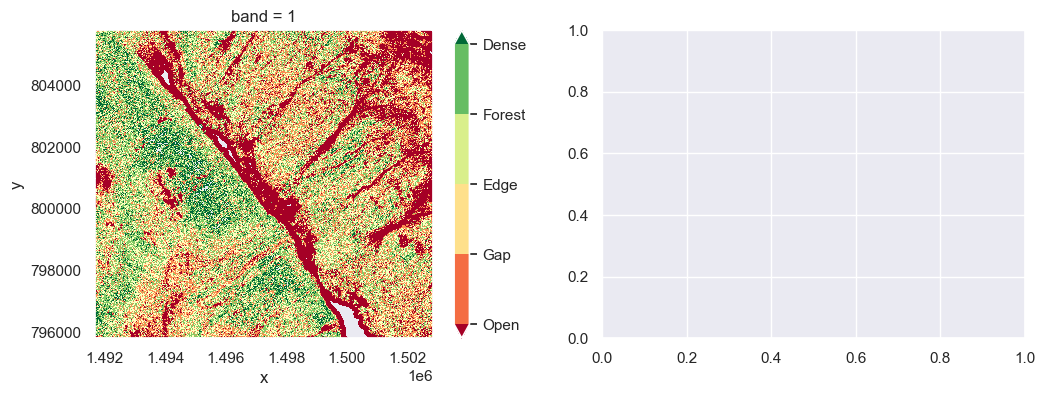

In [91]:
# Setting up the xticks for the classification
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cmap = mpl.cm.RdYlGn
ds.dce_reclass.plot(ax = axes[0], cmap=cmap, add_colorbar=False) 

norm = mpl.colors.BoundaryNorm([100,200,300,400,500], cmap.N, extend='both')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn'), ax=axes[0])

cbar.ax.set_yticklabels(['Open', 'Gap', 'Edge', 'Forest', 'Dense'])

plt.show()

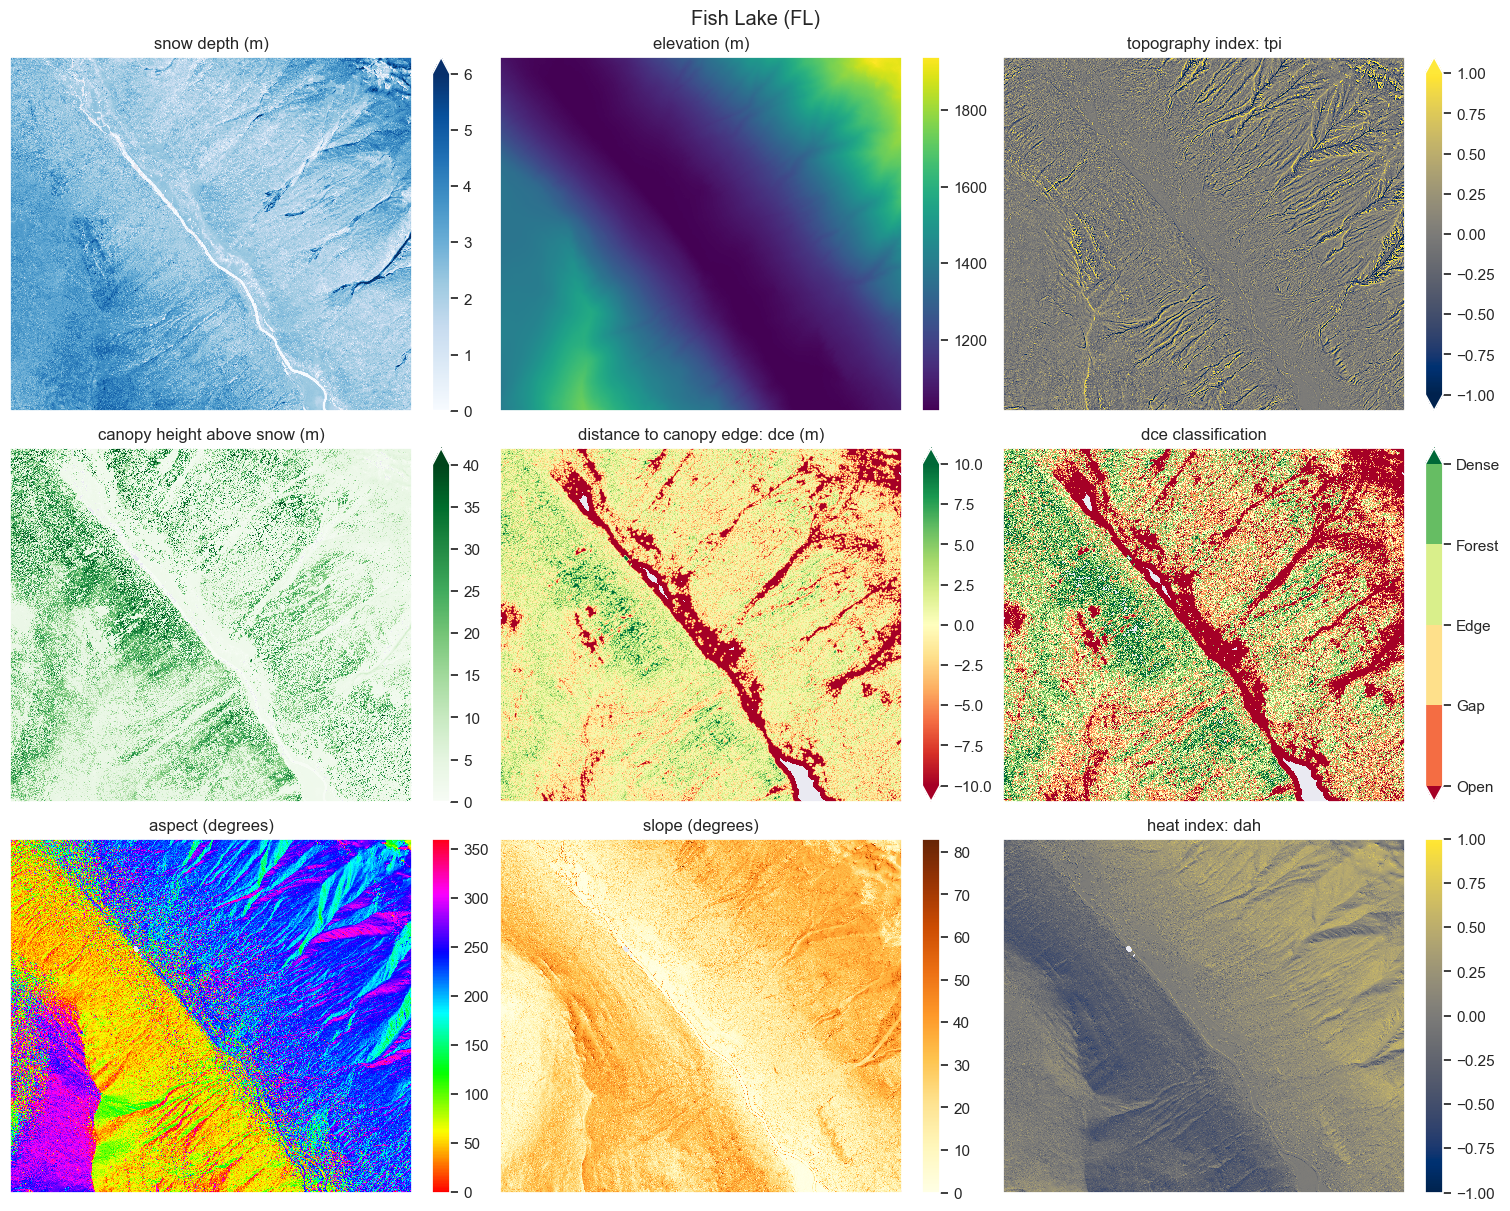

In [100]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,12), constrained_layout = True)
    # gridspec_kw={'height_ratios': [1, 1, 2, 1, 2, 2, 2]})

fig.suptitle('Fish Lake (FL)')


# row 1 with snow depth and dem
ds.snowdepth.plot(ax=axes[0,0], cmap='Blues', vmin=0, vmax=6, cbar_kwargs={'label':''})
ds.dem.plot(ax=axes[0,1], cmap='viridis', cbar_kwargs={'label':''})
ds.tpi.plot(ax=axes[0,2], cmap='cividis', vmin=-1, vmax=1, cbar_kwargs={'label':''})

axes[0,0].set_title('snow depth (m)')
axes[0,1].set_title('elevation (m)')
axes[0,2].set_title('topography index: tpi')

# row 2 with canopy 
ds.chm.plot(ax=axes[1,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''})
ds.dce.plot(ax=axes[1,1], cmap='RdYlGn', vmin=-10, vmax=10, cbar_kwargs={'label':''})
# ds.dce_reclass.plot(ax=axes[1,2], cmap='RdYlGn', cbar_kwargs={'label':''}) # use this is not discrete colorbar used below

# discrete colormap for classifications -------------------------------
cmap = mpl.cm.RdYlGn
norm = mpl.colors.BoundaryNorm([0, 100,200,300,400,500, 600], cmap.N, extend='both')
# norm = mpl.colors.BoundaryNorm([100,200,300,400,500], cmap.N, extend='both')

ds.dce_reclass.plot(ax=axes[1,2], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn'), ax=axes[1,2])
cbar.ax.set_yticklabels(['Open', 'Gap', 'Edge', 'Forest', 'Dense'])
cbar.ax.set_yticklabels(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', ''])

# done -----------------------------------------------------------------

axes[1,0].set_title('canopy height above snow (m)')
axes[1,1].set_title('distance to canopy edge: dce (m)')
axes[1,2].set_title('dce classification')

# row 3 with slope aspect dah
ds.aspect.plot(ax=axes[2,0], cmap='hsv', vmin=-1, vmax=360, cbar_kwargs={'label':''})
ds.slope.plot(ax=axes[2,1], cmap='YlOrBr', cbar_kwargs={'label':''})
ds.dah.plot(ax=axes[2,2], cmap='cividis', vmin=-1, vmax=1, cbar_kwargs={'label':''})
                       
axes[2,0].set_title('aspect (degrees)')
axes[2,1].set_title('slope (degrees)')
axes[2,2].set_title('heat index: dah')


# fix all labels and ticks 
# for ax in axes: # this loop is not working for some reason 
#     ax.xlabel('')

# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# row 3 
axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])

plt.show()

In [17]:
# f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))

# f.suptitle('Fish Lake small domain: snow depth predictors used in random forest model')

# ds.dem.plot(ax=axes[0], cmap='viridis')
# ds.dah_reclass.plot(ax=axes[1], cmap='cividis')
# ds.dce_reclass.plot(ax=axes[2], cmap='RdYlGn')

# axes[0].set_title('elevation (m)')
# axes[1].set_title('dah reclassified')
# axes[2].set_title('dce reclassifed: 100 (large gaps) -> 500 (large clusters)')

# plt.tight_layout()

In [14]:
# f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))

# f.suptitle('Fish Lake small domain: snow depth predictors used in random forest model')

# ds.dem.plot(ax=axes[0], cmap='viridis')
# ds.dah_reclass.plot(ax=axes[1], cmap='cividis')
# ds.dce_reclass.plot(ax=axes[2], cmap='RdYlGn')

# axes[0].set_title('elevation (m)')
# axes[1].set_title('dah reclassified')
# axes[2].set_title('dce reclassifed: 100 (large gaps) -> 500 (large clusters)')

# plt.tight_layout()

In [ ]:
# f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))

# f.suptitle('Fish Lake small domain')

# ds.dem.plot(ax=axes[0], cmap='viridis')
# ds.dah.plot(ax=axes[1], cmap='cividis')
# ds.dah_reclass.plot(ax=axes[2], cmap='cividis')

# axes[0].set_title('elevation (m)')
# axes[2].set_title('dah reclassifed')

# plt.tight_layout()

In [11]:
# plt.figure(figsize=(7,6))

# plt.hexbin(dce_flat, dah_flat, C=snowdepth_flat, cmap='Blues', 
#           gridsize=20, mincnt=2)

# # hb = ax.hexbin(gdf.geometry.x, 
# #                gdf.geometry.y, 
# #                gridsize=100, 
# #                cmap=cmap1, 
# # #                cmap = cmocean.tools.crop(cmap, 0, 200, 10, N=None),
# #                mincnt=1,
# #                vmin=1,
# #                vmax=500,
# #                bins='log',
# #                edgecolor='k')

# cb = plt.colorbar()
# cb.set_label('snow depth (m)')

# plt.xlabel(dce_label)
# plt.ylabel(dah_label)
# # plt.xlim([-20,20])
# plt.ylim([-1,1])

# plt.title('Fish Lake small domain')
# plt.show()

## Box and Violin Plots

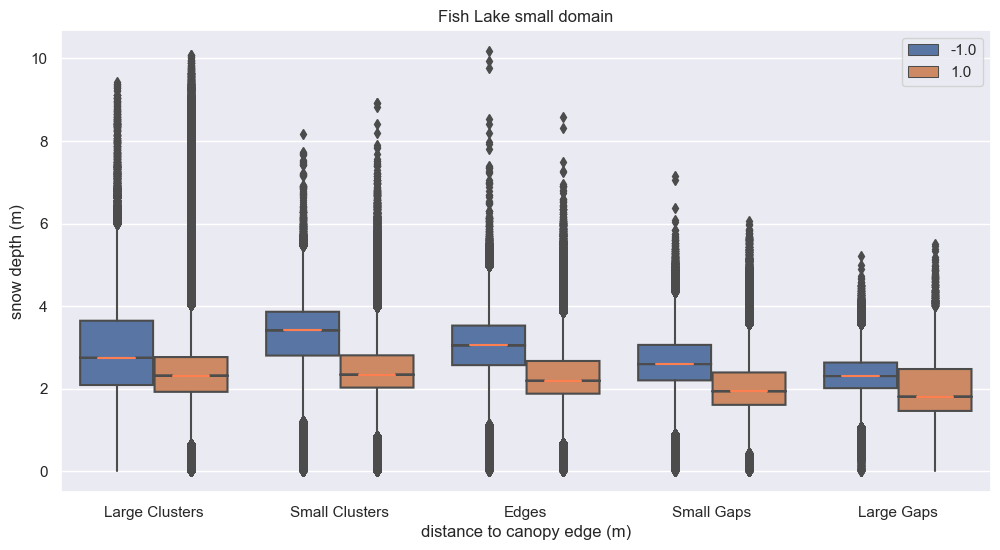

In [12]:
plt.figure(figsize=(12,6))

sns.boxplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake small domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
# plt.xticks([100,200,300,400,500], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

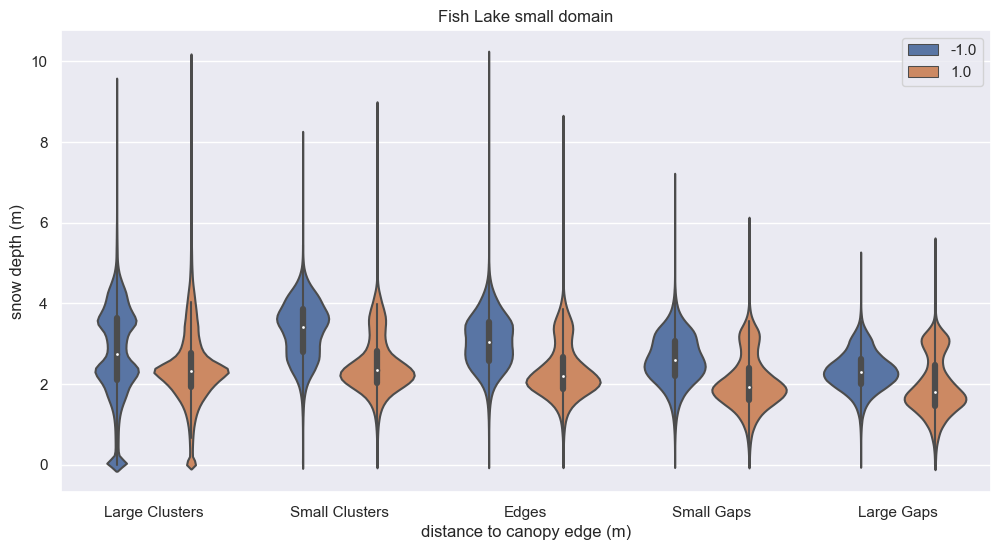

In [13]:
plt.figure(figsize=(12,6))

sns.violinplot(x=dce_reclass_flat, y=snowdepth_flat, alpha=.8, hue=dah_reclass_flat) # palette={1: 'orange', -1: 'blue'})
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake small domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

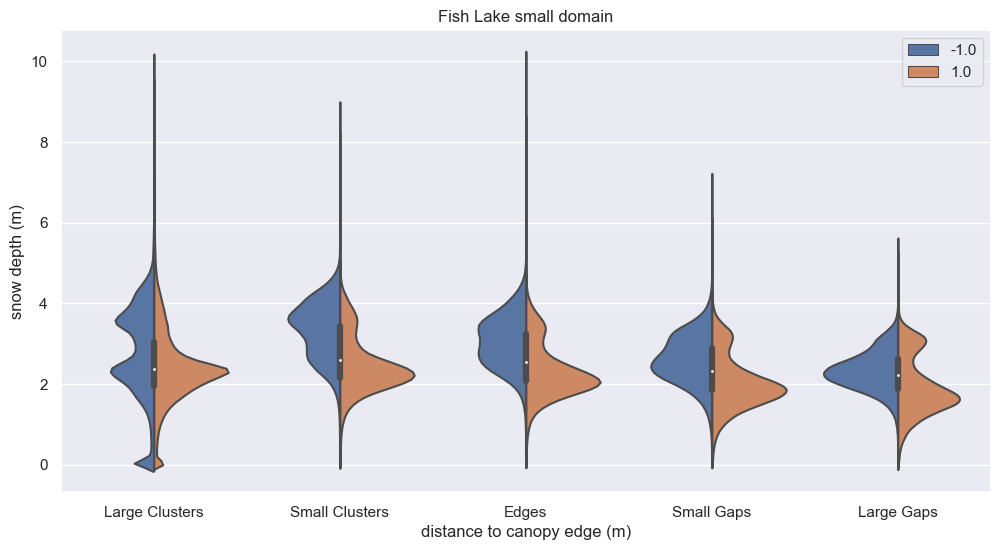

In [14]:
# plt.figsize((10,10))
plt.figure(figsize=(12,6))

sns.violinplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_flat, split=True)
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake small domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

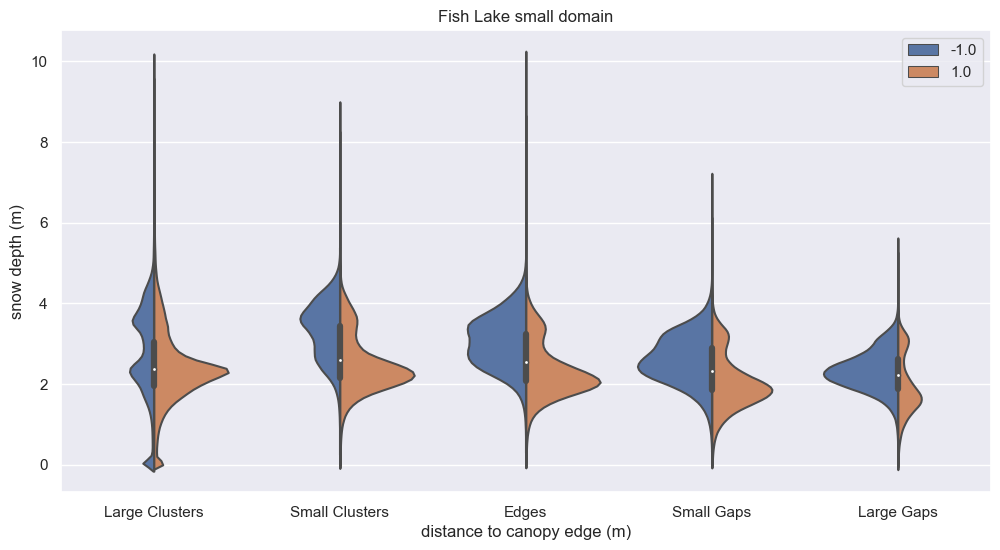

In [15]:
# plt.figsize((10,10))
plt.figure(figsize=(12,6))

sns.violinplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_flat, split=True, scale='count') #bw=.01) # a narrower bandwidth for smoothing
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake small domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

In [16]:
# ## DO NOT RETURN UNLESS YOU WANT TO SPIN FOREVER
# sns.kdeplot(x=dce_giulia_flat, y=snowdepth_flat, hue=dah_reclass_2_flat, palette={1: 'yellow', -1: 'lightblue'})
# sns.kdeplot(x=dce_flat, y=snowdepth_flat, hue=dah_reclass_2_flat, palette={1: 'darkorange', -1: 'darkblue'})

# plt.xlabel(dce_label)
# plt.ylabel(snow_label)
# plt.title('CER Small Domain: My DCE (dark) plotted on top of Giulia DCE (light)')

# plt.show()

### Hist of groups 

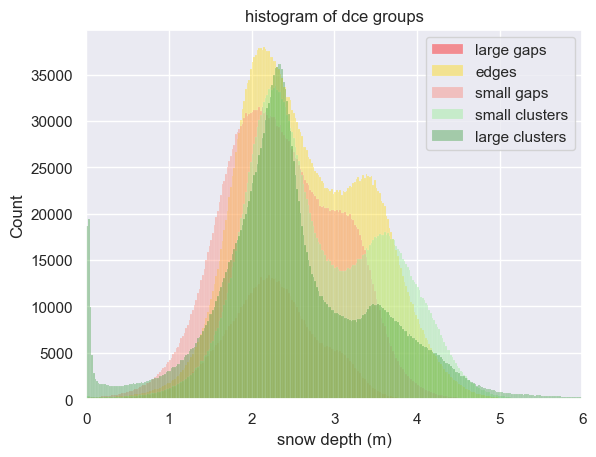

In [17]:
alpha = 0.4
binwidth = 0.02

sns.histplot(data=largegaps_flat, label='large gaps', color='red', alpha=alpha, binwidth=binwidth)
sns.histplot(data=canopyedges_flat, label='edges', color='gold', alpha=alpha, binwidth=binwidth)
sns.histplot(data=smallgaps_flat, label='small gaps', color='salmon', alpha=alpha, binwidth=binwidth)
sns.histplot(data=smallclusters_flat, label='small clusters', color='lightgreen', alpha=alpha, binwidth=binwidth)
sns.histplot(data=largeclusters_flat, label='large clusters', color='green', alpha=0.3, binwidth=binwidth)

plt.xlim([0,6])
# plt.ylim([0,3000])
plt.xlabel('snow depth (m)')
plt.title('histogram of dce groups')
plt.legend()

In [18]:
# alpha = 0.2
# binwidth = 0.02

# sns.histplot(data=largegaps_flat, label='large gaps', color='red', alpha=alpha, binwidth=binwidth, kde=True)
# sns.histplot(data=canopyedges_flat, label='edges', color='gold', alpha=alpha, binwidth=binwidth, kde=True)
# sns.histplot(data=smallgaps_flat, label='small gaps', color='salmon', alpha=alpha, binwidth=binwidth, kde=True)
# sns.histplot(data=smallclusters_flat, label='small clusters', color='lightgreen', alpha=alpha, binwidth=binwidth, kde=True)
# sns.histplot(data=largeclusters_flat, label='large clusters', color='green', alpha=alpha, binwidth=binwidth, kde=True)

# axes[0].set_xlim([0,6])
# plt.xlabel('snow depth (m)')
# plt.title('histogram of dce groups')
# plt.legend()
# plt.show()

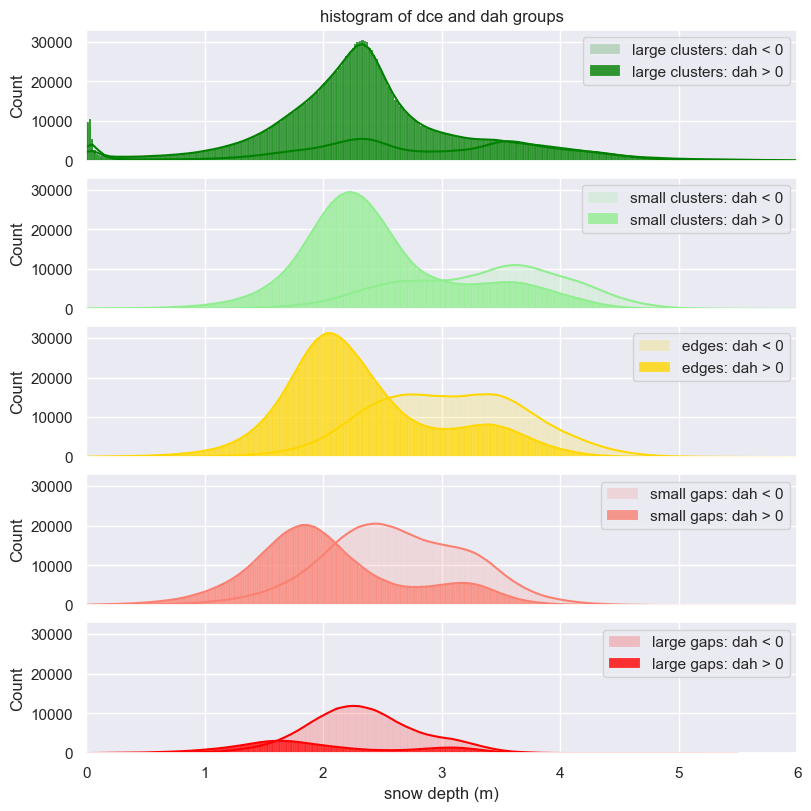

In [19]:
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.2
alpha2 = 0.8

binwidth = 0.02 # snow depth into bins (2 cm?)

sns.histplot(ax=axes[0], data=largeclusters_dahneg_flat, label='large clusters: dah < 0', color='green', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[0], data=largeclusters_dahpos_flat, label='large clusters: dah > 0', color='green', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[1], data=smallclusters_dahneg_flat, label='small clusters: dah < 0', color='lightgreen', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[1], data=smallclusters_dahpos_flat, label='small clusters: dah > 0', color='lightgreen', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[2], data=canopyedges_dahneg_flat,  label='edges: dah < 0', color='gold', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[2], data=canopyedges_dahpos_flat,  label='edges: dah > 0', color='gold', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[3], data=smallgaps_dahneg_flat,    label='small gaps: dah < 0', color='salmon', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[3], data=smallgaps_dahpos_flat,    label='small gaps: dah > 0', color='salmon', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[4], data=largegaps_dahneg_flat,    label='large gaps: dah < 0', color='red', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[4], data=largegaps_dahpos_flat,    label='large gaps: dah > 0', color='red', alpha=alpha2, binwidth=binwidth, kde=True)


axes[0].set_xlim([0,6])
# axes[0].set_ylim([0,3000])

axes[4].set_xlabel('snow depth (m)')
axes[0].set_title('histogram of dce and dah groups')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
plt.show()

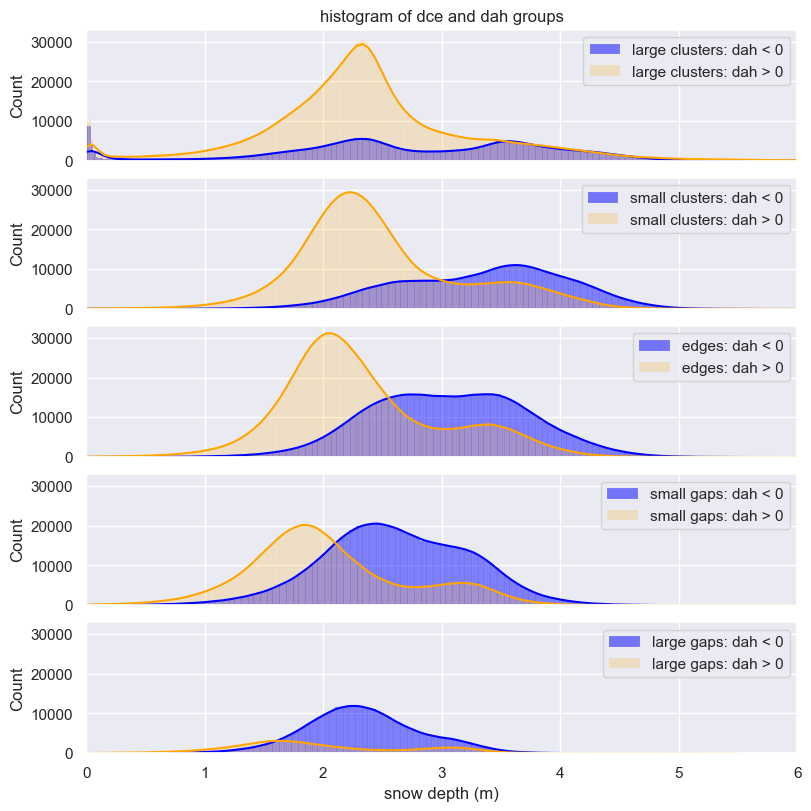

In [20]:
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.5
alpha2 = 0.2

binwidth = 0.02 # snow depth into bins (2 cm?)

sns.histplot(ax=axes[0], data=largeclusters_dahneg_flat, label='large clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[0], data=largeclusters_dahpos_flat, label='large clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[1], data=smallclusters_dahneg_flat, label='small clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[1], data=smallclusters_dahpos_flat, label='small clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[2], data=canopyedges_dahneg_flat,  label='edges: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[2], data=canopyedges_dahpos_flat,  label='edges: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[3], data=smallgaps_dahneg_flat,    label='small gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[3], data=smallgaps_dahpos_flat,    label='small gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

sns.histplot(ax=axes[4], data=largegaps_dahneg_flat,    label='large gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
sns.histplot(ax=axes[4], data=largegaps_dahpos_flat,    label='large gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)


axes[0].set_xlim([0,6])
# axes[0].set_ylim([0,3000])

axes[4].set_xlabel('snow depth (m)')
axes[0].set_title('histogram of dce and dah groups')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
plt.show()

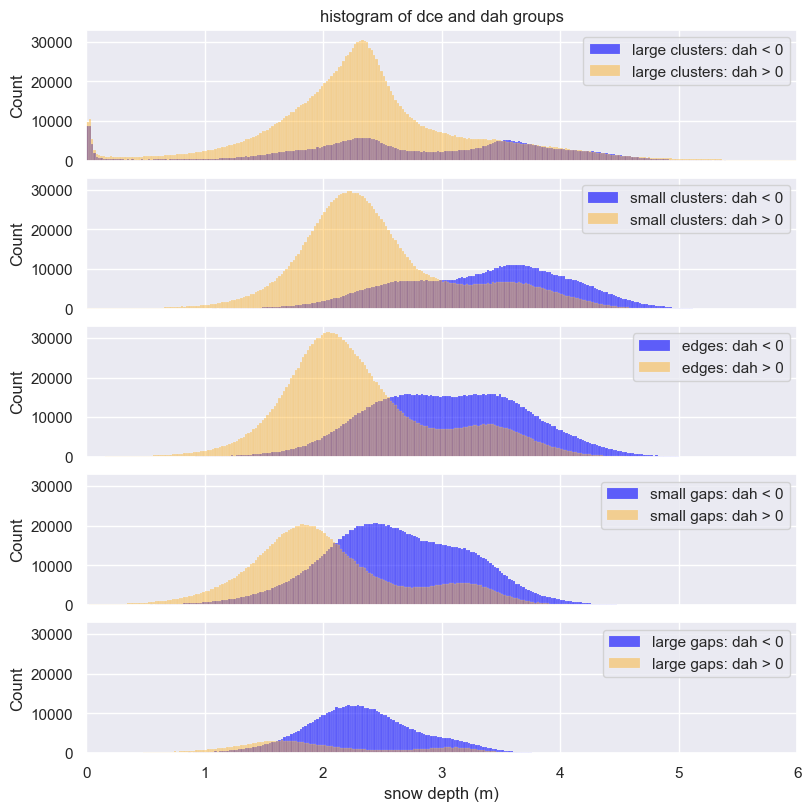

In [21]:
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.6
alpha2 = 0.4

binwidth = 0.02 # snow depth into bins (2 cm?)

sns.histplot(ax=axes[0], data=largeclusters_dahneg_flat, label='large clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[0], data=largeclusters_dahpos_flat, label='large clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth)

sns.histplot(ax=axes[1], data=smallclusters_dahneg_flat, label='small clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[1], data=smallclusters_dahpos_flat, label='small clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth)

sns.histplot(ax=axes[2], data=canopyedges_dahneg_flat,  label='edges: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[2], data=canopyedges_dahpos_flat,  label='edges: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth)

sns.histplot(ax=axes[3], data=smallgaps_dahneg_flat,    label='small gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[3], data=smallgaps_dahpos_flat,    label='small gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth)

sns.histplot(ax=axes[4], data=largegaps_dahneg_flat,    label='large gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[4], data=largegaps_dahpos_flat,    label='large gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth)


axes[0].set_xlim([0,6])
# axes[0].set_ylim([0,3000])

axes[4].set_xlabel('snow depth (m)')
axes[0].set_title('histogram of dce and dah groups')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
plt.show()

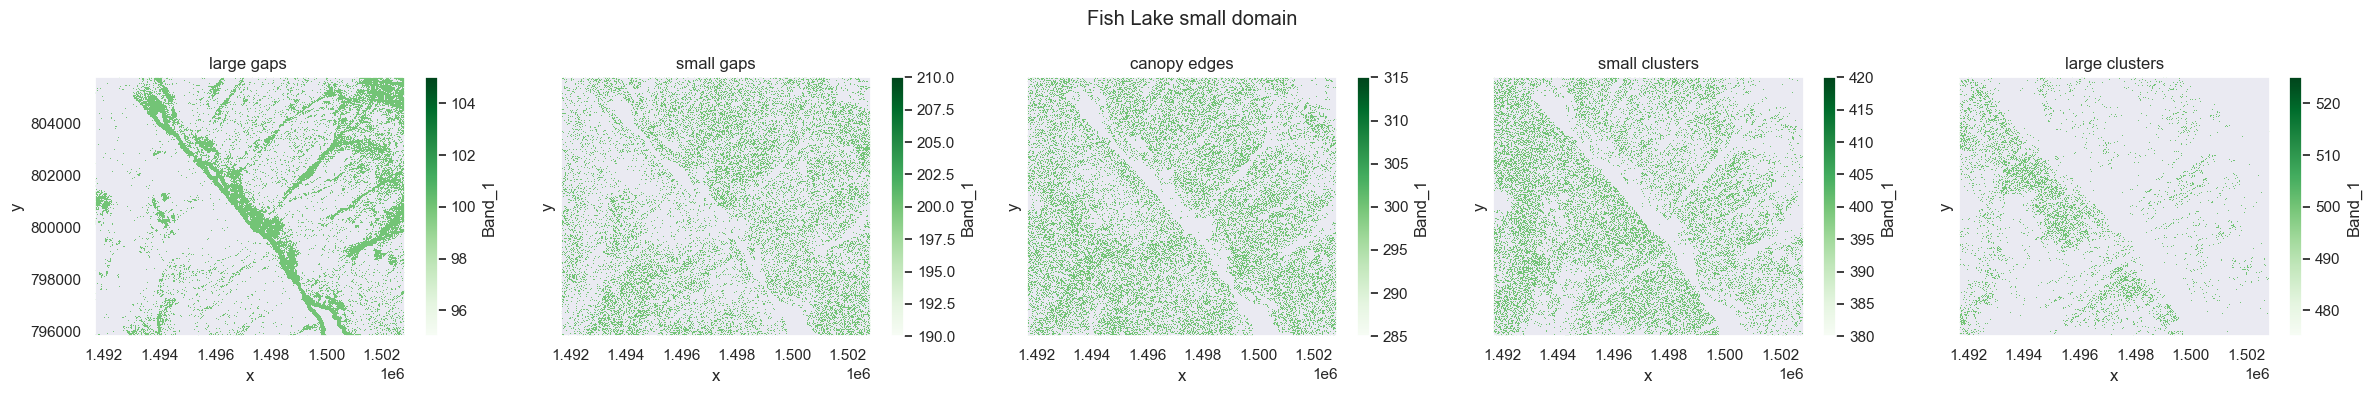

In [28]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(24,4))

f.suptitle('Fish Lake small domain')

(ds.dce_reclass.where(ds.dce_reclass == 100)).plot(ax=axes[0], cmap='Greens')
(ds.dce_reclass.where(ds.dce_reclass == 200)).plot(ax=axes[1], cmap='Greens')
(ds.dce_reclass.where(ds.dce_reclass == 300)).plot(ax=axes[2], cmap='Greens')
(ds.dce_reclass.where(ds.dce_reclass == 400)).plot(ax=axes[3], cmap='Greens')
(ds.dce_reclass.where(ds.dce_reclass == 500)).plot(ax=axes[4], cmap='Greens')

axes[0].set_title('large gaps ')
axes[1].set_title('small gaps')
axes[2].set_title('canopy edges')
axes[3].set_title('small clusters')
axes[4].set_title('large clusters')

plt.tight_layout()

# Add in Elevation Data and take a look how this changes with elevation...

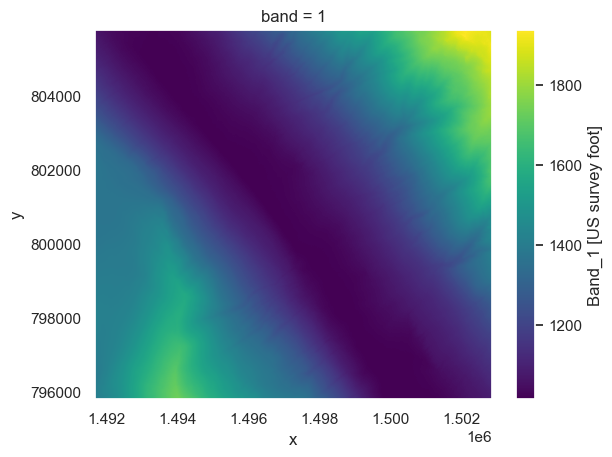

In [8]:
ds.dem.plot()

In [10]:
ds

<xarray.Dataset>
Dimensions:                         (x: 3725, y: 3330, band: 1)
Coordinates:
  * x                               (x) float64 1.492e+06 ... 1.503e+06
  * y                               (y) float64 8.058e+05 ... 7.958e+05
  * band                            (band) int32 1
Data variables: (12/29)
    snowdepth                       (band, y, x) float32 2.346 2.107 ... 1.1
    dce                             (band, y, x) float32 2.865 3.78 ... -12.5
    dem                             (band, y, x) float32 1.06e+03 ... 1.091e+03
    dah                             (band, y, x) float32 -0.3723 ... 0.2329
    dah_reclass                     (band, y, x) float32 -1.0 -1.0 ... 1.0 1.0
    dce_reclass                     (band, y, x) float32 400.0 500.0 ... 100.0
    ...                              ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...
    spatial_ref                     int32 ...

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha = 0.5

fig.suptitle('Fish Lake small domain')

sns.histplot(ax=axes[0], data=snowdepth_flat, label='snow depth', color='blue', alpha=alpha, binwidth=0.2, kde=False) # bin 20 cm? 
sns.histplot(ax=axes[1], data=dce_flat,       label='dce', color='green', alpha=alpha, binwidth=1, kde=False) # bin 1 meter? 
sns.histplot(ax=axes[2], data=dah_flat,       label='dah', color='grey', alpha=alpha, binwidth=.05, kde=False) # bin 1 meter? 

axes[0].set_xlim([0,8])
# axes[1].set_xlim([-20,20])
axes[2].set_xlim([-1,1])

axes[0].set_xlabel(snow_label)
axes[1].set_xlabel(dce_label)
axes[2].set_xlabel(dah_label)

plt.show()

Text(0.5, 0, 'elevation (m)')

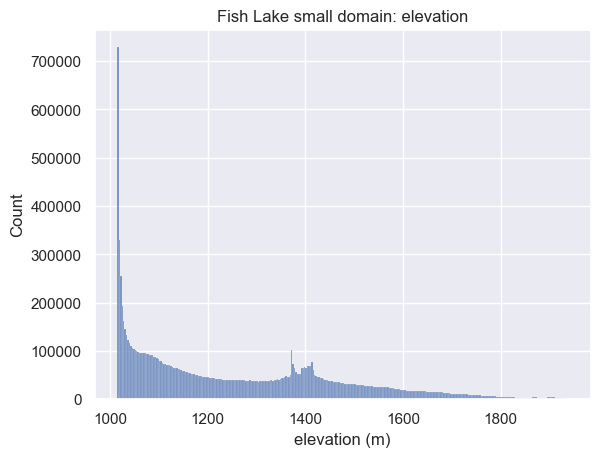

In [7]:
sns.histplot(data=dem_flat)
plt.title('Fish Lake small domain: elevation')
plt.xlabel('elevation (m)')

In [9]:
ds['snowdepth'] = ds.snowdepth.where(ds.snowdepth > -1)
ds['dce_reclass'] = ds.dce_reclass.where( ds.dce_reclass > -1)
ds['dah_reclass'] = ds.dah_reclass.where( ds.dah_reclass > -10)

# something is going on with -9999.... ugh 

ds['bydem_4'] = ds.dem.where( ds.dem > 1600)
ds['bydem_3'] = ds.dem.where((ds.dem < 1600) & (ds.dem > 1400))
ds['bydem_2'] = ds.dem.where((ds.dem < 1400) & (ds.dem > 1200))
ds['bydem_1'] = ds.dem.where((ds.dem < 1200) & (ds.dem >= 0))

ds['dce_reclass_bydem_4'] = ds.dce_reclass.where( ds.dem > 1600)
ds['dce_reclass_bydem_3'] = ds.dce_reclass.where((ds.dem < 1600) & (ds.dem > 1400))
ds['dce_reclass_bydem_2'] = ds.dce_reclass.where((ds.dem < 1400) & (ds.dem > 1200))
ds['dce_reclass_bydem_1'] = ds.dce_reclass.where((ds.dem < 1200) & (ds.dem >= 0))

ds['snowdepth_bydem_4'] = ds.snowdepth.where( ds.dem > 1600)
ds['snowdepth_bydem_3'] = ds.snowdepth.where((ds.dem < 1600) & (ds.dem > 1400))
ds['snowdepth_bydem_2'] = ds.snowdepth.where((ds.dem < 1400) & (ds.dem > 1200))
ds['snowdepth_bydem_1'] = ds.snowdepth.where((ds.dem < 1200) & (ds.dem >= 0))

ds['dah_reclass_bydem_4'] = ds.dah_reclass.where( ds.dem > 1600)
ds['dah_reclass_bydem_3'] = ds.dah_reclass.where((ds.dem < 1600) & (ds.dem > 1400))
ds['dah_reclass_bydem_2'] = ds.dah_reclass.where((ds.dem < 1400) & (ds.dem > 1200))
ds['dah_reclass_bydem_1'] = ds.dah_reclass.where((ds.dem < 1200) & (ds.dem >= 0))

dce_reclass_bydem_1_flat = ds['dce_reclass_bydem_1'].values.flatten()
dce_reclass_bydem_2_flat = ds['dce_reclass_bydem_2'].values.flatten()
dce_reclass_bydem_3_flat = ds['dce_reclass_bydem_3'].values.flatten()
dce_reclass_bydem_4_flat = ds['dce_reclass_bydem_4'].values.flatten()

snowdepth_bydem_1_flat = ds['snowdepth_bydem_1'].values.flatten()
snowdepth_bydem_2_flat = ds['snowdepth_bydem_2'].values.flatten()
snowdepth_bydem_3_flat = ds['snowdepth_bydem_3'].values.flatten()
snowdepth_bydem_4_flat = ds['snowdepth_bydem_4'].values.flatten()

dah_reclass_bydem_1_flat = ds['dah_reclass_bydem_1'].values.flatten()
dah_reclass_bydem_2_flat = ds['dah_reclass_bydem_2'].values.flatten()
dah_reclass_bydem_3_flat = ds['dah_reclass_bydem_3'].values.flatten()
dah_reclass_bydem_4_flat = ds['dah_reclass_bydem_4'].values.flatten()

In [10]:
bydem_1_flat = ds['bydem_1'].values.flatten()
bydem_2_flat = ds['bydem_2'].values.flatten()
bydem_3_flat = ds['bydem_3'].values.flatten()
bydem_4_flat = ds['bydem_4'].values.flatten()

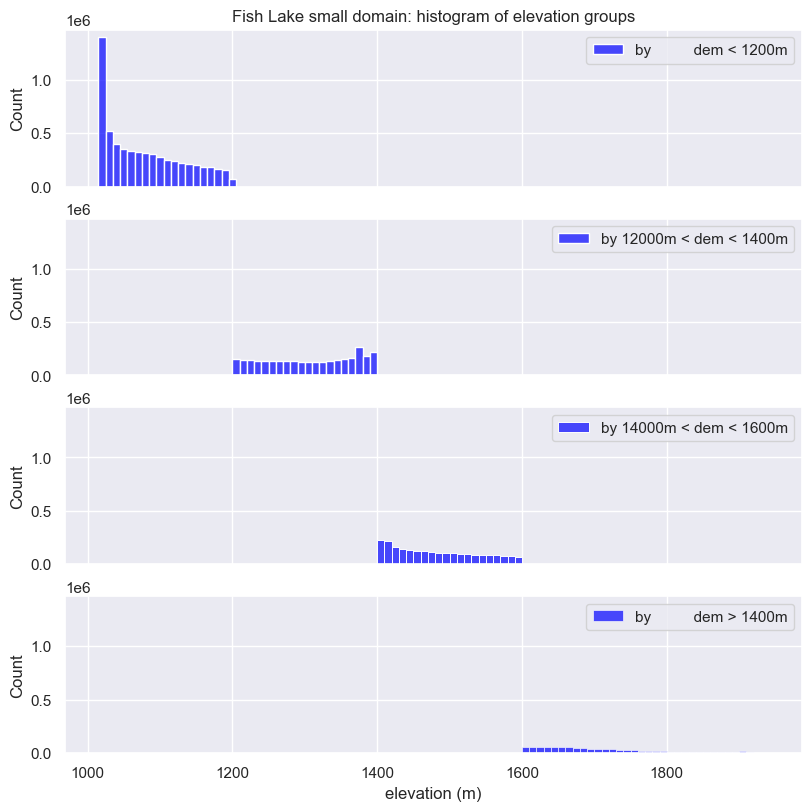

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.7
alpha2 = 0.7

binwidth = 10 # elevation into... 10 meter bins? 

sns.histplot(ax=axes[0], data=bydem_1_flat, label='large clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[1], data=bydem_2_flat, label='small clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[2], data=bydem_3_flat,  label='edges: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)
sns.histplot(ax=axes[3], data=bydem_4_flat,    label='small gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth)

# axes[0].set_xlim([0,6])
# axes[0].set_ylim([0,3000])

axes[3].set_xlabel('elevation (m)')
axes[0].set_title('Fish Lake small domain: histogram of elevation groups')

axes[0].legend(['by          dem < 1200m'])
axes[1].legend(['by 12000m < dem < 1400m'])
axes[2].legend(['by 14000m < dem < 1600m'])
axes[3].legend(['by          dem > 1400m'])

plt.show()

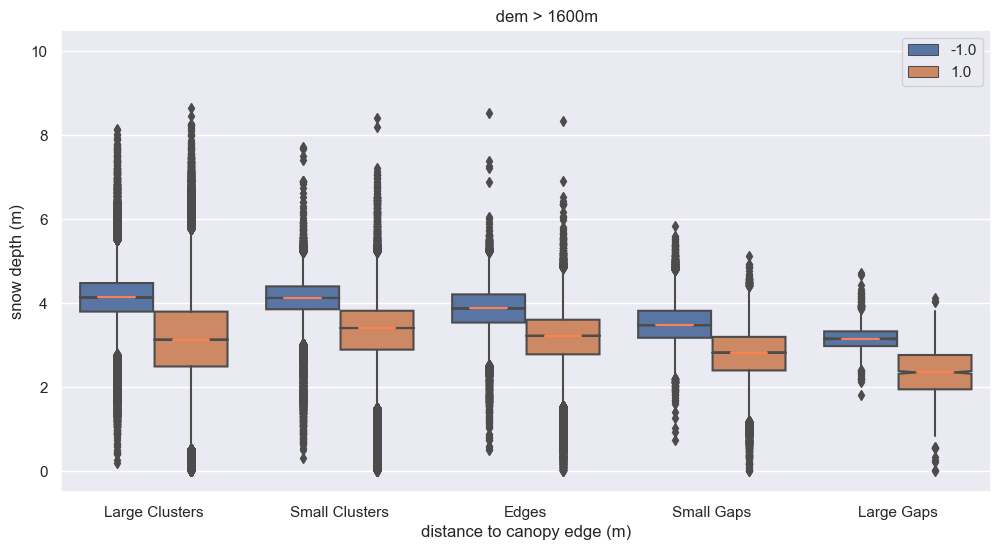

In [60]:
plt.figure(figsize=(12,6))

# sns.boxplot(x=dce_reclass_bydem_1_flat, y=snowdepth_bydem_1_flat, hue=dah_reclass_bydem_1_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
# sns.boxplot(x=dce_reclass_bydem_2_flat, y=snowdepth_bydem_2_flat, hue=dah_reclass_bydem_2_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
# sns.boxplot(x=dce_reclass_bydem_3_flat, y=snowdepth_bydem_3_flat, hue=dah_reclass_bydem_3_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
sns.boxplot(x=dce_reclass_bydem_4_flat, y=snowdepth_bydem_4_flat, hue=dah_reclass_bydem_4_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})

plt.xlabel(dce_label)
plt.ylabel(snow_label)

# plt.title('         dem < 1200m')
# plt.title('12000m < dem < 1400m')
# plt.title('14000m < dem < 1600m')
plt.title('         dem > 1600m')

plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
plt.ylim([-0.5,10.5])

plt.show()

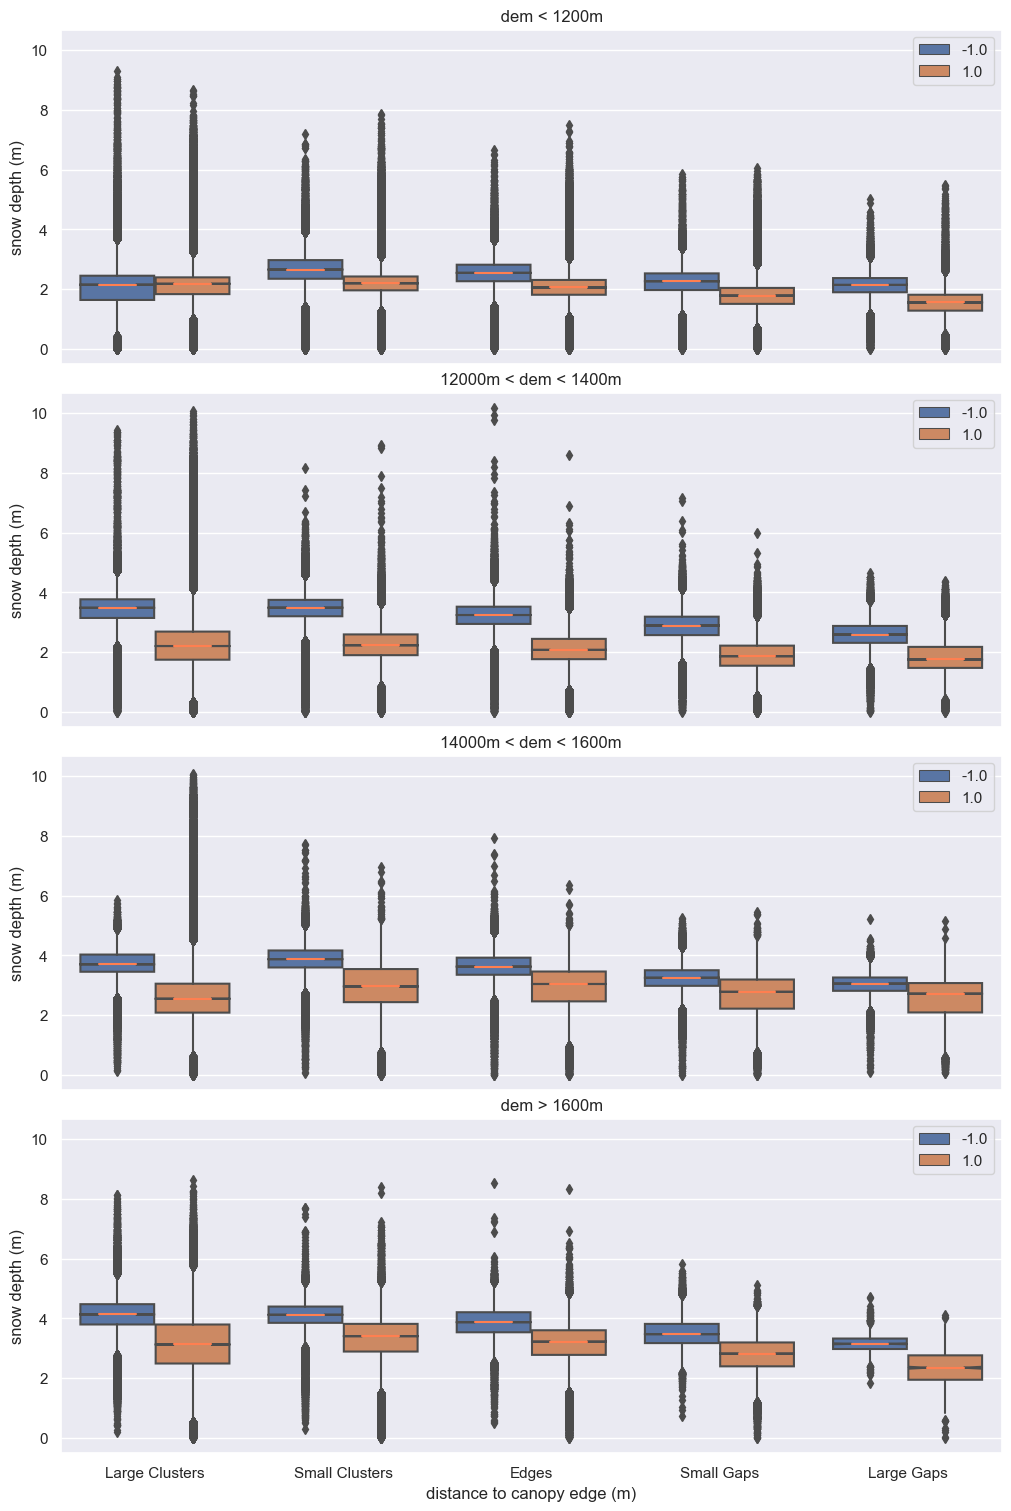

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(10,15), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.7

binwidth = 10 # elevation into... 10 meter bins? 

sns.boxplot(ax=axes[0], x=dce_reclass_bydem_1_flat, y=snowdepth_bydem_1_flat, hue=dah_reclass_bydem_1_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x=dce_reclass_bydem_2_flat, y=snowdepth_bydem_2_flat, hue=dah_reclass_bydem_2_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x=dce_reclass_bydem_3_flat, y=snowdepth_bydem_3_flat, hue=dah_reclass_bydem_3_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x=dce_reclass_bydem_4_flat, y=snowdepth_bydem_4_flat, hue=dah_reclass_bydem_4_flat, notch=True, showcaps=False, medianprops={"color":"coral"})

# axes[0].set_ylim([0,12])

axes[0].set_ylabel(snow_label)
axes[1].set_ylabel(snow_label)
axes[2].set_ylabel(snow_label)
axes[3].set_ylabel(snow_label)
axes[3].set_xlabel(dce_label)

axes[0].set_title('         dem < 1200m')
axes[1].set_title('12000m < dem < 1400m')
axes[2].set_title('14000m < dem < 1600m')
axes[3].set_title('         dem > 1600m')

plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

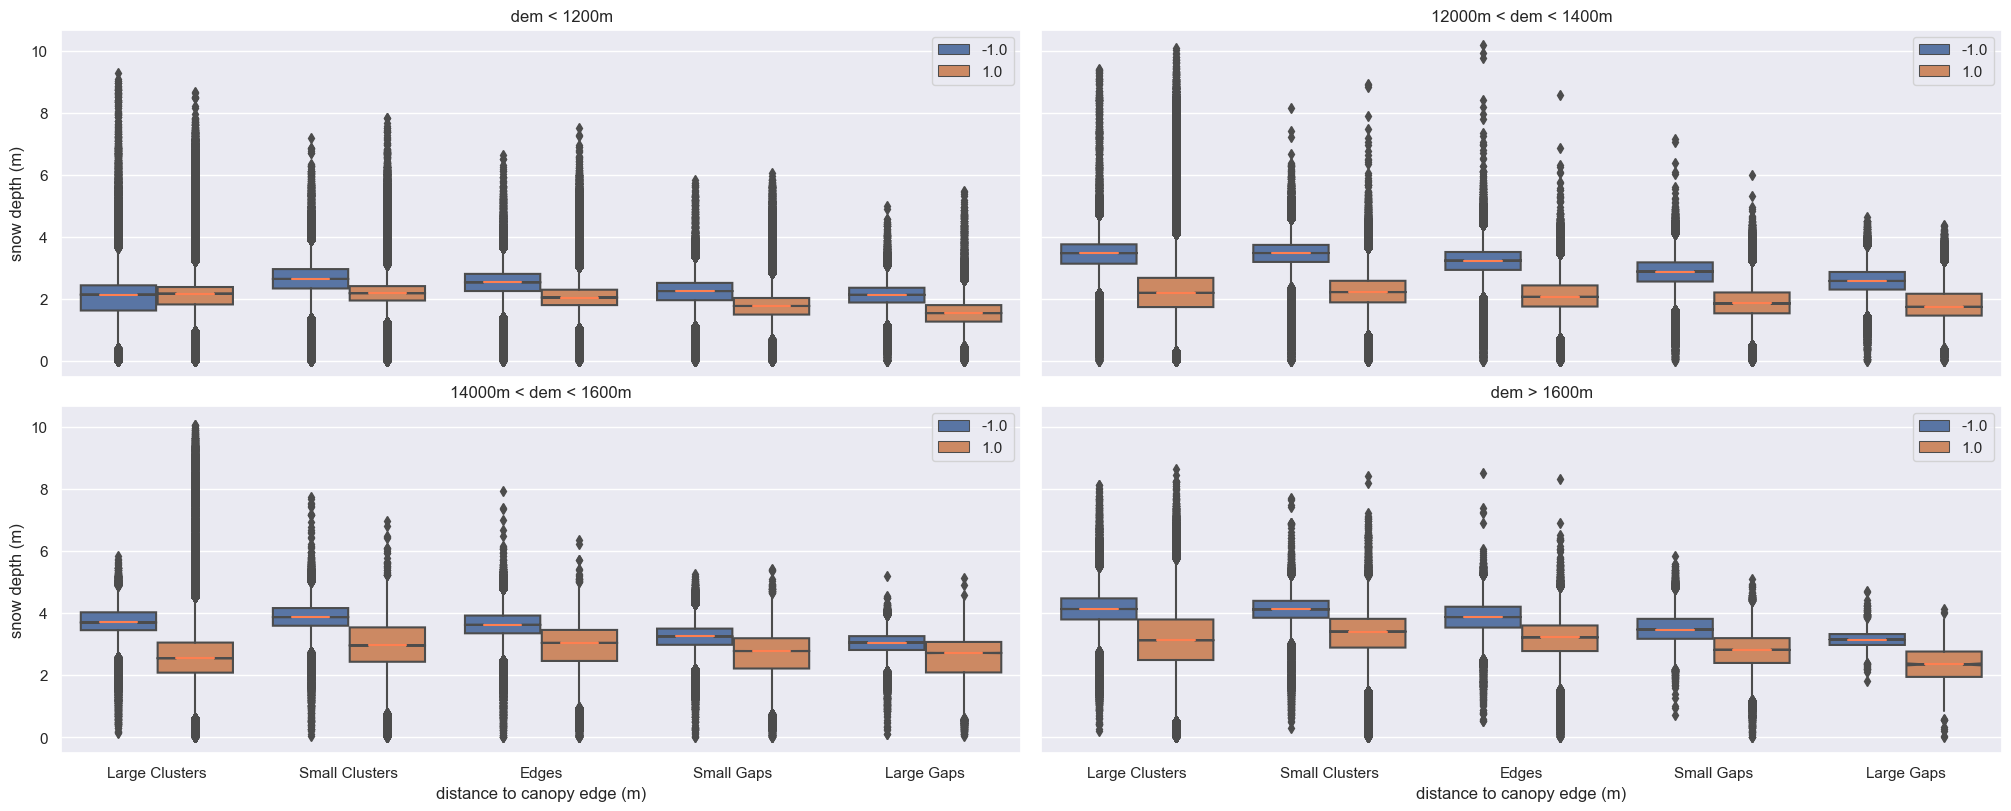

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha1 = 0.7

binwidth = 10 # elevation into... 10 meter bins? 

sns.boxplot(ax=axes[0,0], x=dce_reclass_bydem_1_flat, y=snowdepth_bydem_1_flat, hue=dah_reclass_bydem_1_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[0,1], x=dce_reclass_bydem_2_flat, y=snowdepth_bydem_2_flat, hue=dah_reclass_bydem_2_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1,0], x=dce_reclass_bydem_3_flat, y=snowdepth_bydem_3_flat, hue=dah_reclass_bydem_3_flat, notch=True, showcaps=False, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1,1], x=dce_reclass_bydem_4_flat, y=snowdepth_bydem_4_flat, hue=dah_reclass_bydem_4_flat, notch=True, showcaps=False, medianprops={"color":"coral"})

# axes[0].set_ylim([0,12])

axes[0,0].set_ylabel(snow_label)
axes[1,0].set_ylabel(snow_label)

axes[1,0].set_xlabel(dce_label)
axes[1,1].set_xlabel(dce_label)

axes[0,0].set_title('         dem < 1200m')
axes[0,1].set_title('12000m < dem < 1400m')
axes[1,0].set_title('14000m < dem < 1600m')
axes[1,1].set_title('         dem > 1600m')

plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

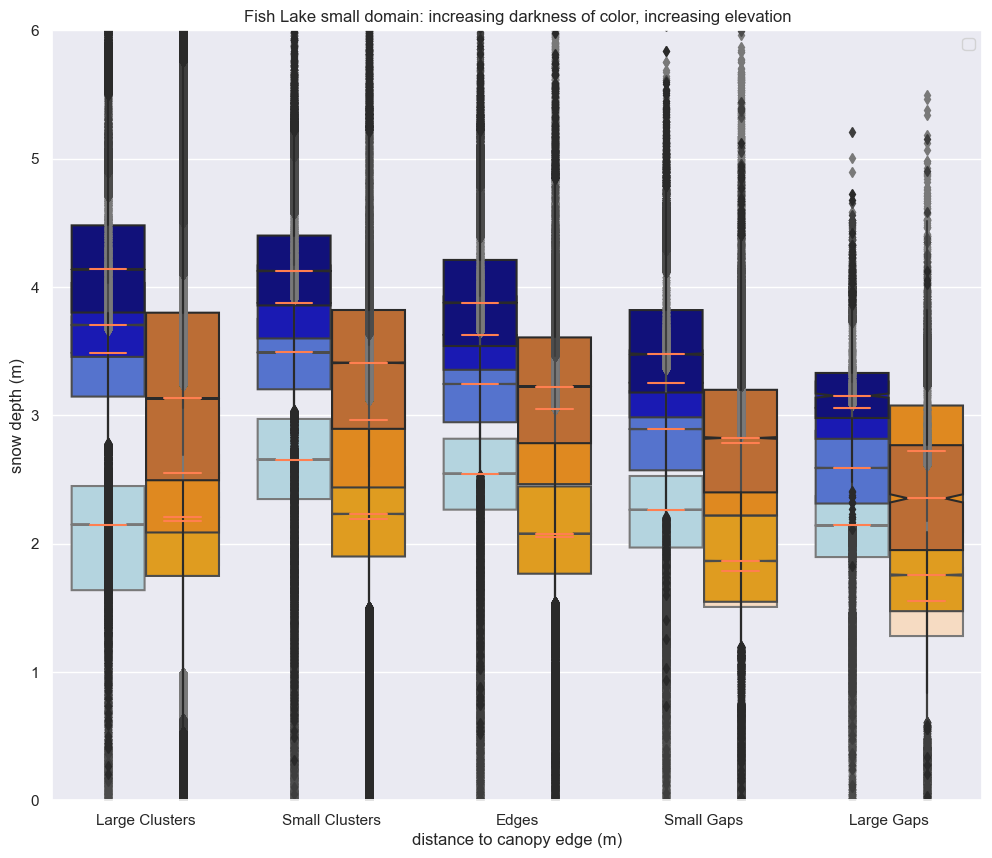

In [49]:
plt.figure(figsize=(12,10))

sns.boxplot(x=dce_reclass_bydem_1_flat, y=snowdepth_bydem_1_flat, hue=dah_reclass_bydem_1_flat, notch=True, 
            showcaps=False, medianprops={"color":"coral"}, palette={1: 'peachpuff', -1: 'lightblue'})

sns.boxplot(x=dce_reclass_bydem_2_flat, y=snowdepth_bydem_2_flat, hue=dah_reclass_bydem_2_flat, notch=True, 
            showcaps=False, medianprops={"color":"coral"}, palette={1: 'orange', -1: 'royalblue'})

sns.boxplot(x=dce_reclass_bydem_3_flat, y=snowdepth_bydem_3_flat, hue=dah_reclass_bydem_3_flat, notch=True, 
            showcaps=False, medianprops={"color":"coral"}, palette={1: 'darkorange', -1: 'mediumblue'})

sns.boxplot(x=dce_reclass_bydem_4_flat, y=snowdepth_bydem_4_flat, hue=dah_reclass_bydem_4_flat, notch=True, 
            showcaps=False, medianprops={"color":"coral"}, palette={1: 'chocolate', -1: 'darkblue'})

plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake small domain: increasing darkness of color, increasing elevation')

plt.legend('')
plt.ylim([0,6])

plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

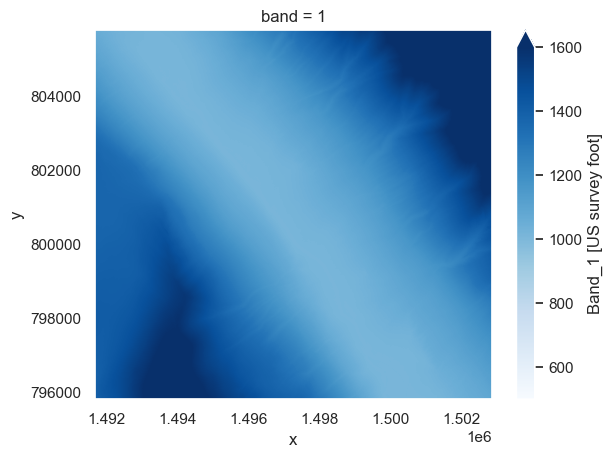

In [38]:
ds['dem'].plot(cmap='Blues', vmin=500, vmax=1600) 

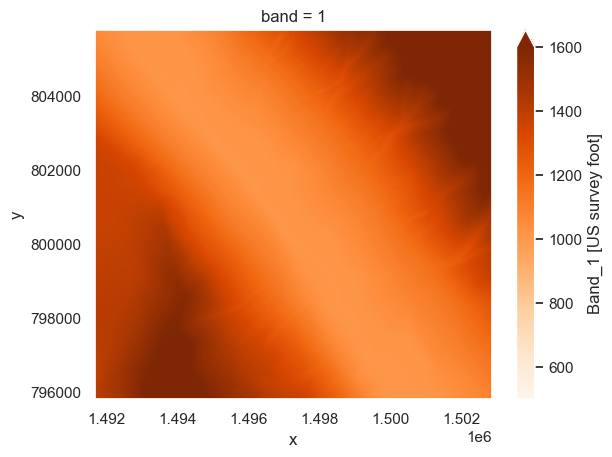

In [44]:
ds['dem'].plot(cmap='Oranges', vmin=500, vmax=1600) 

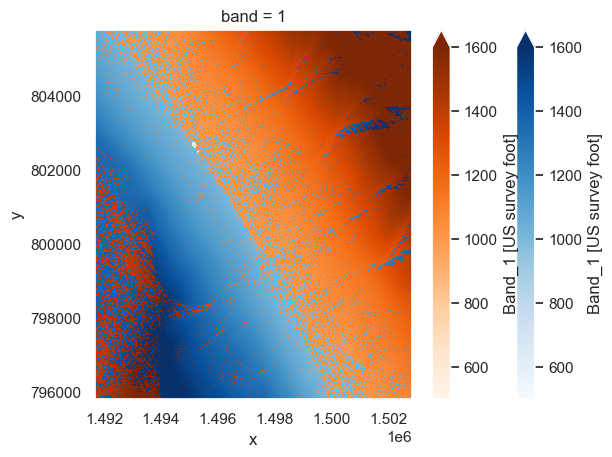

In [45]:
(ds['dem'].where(ds['dah'] < 0)).plot(cmap='Blues', vmin=500, vmax=1600) 
(ds['dem'].where(ds['dah'] >=0)).plot(cmap='Oranges', vmin=500, vmax=1600) 

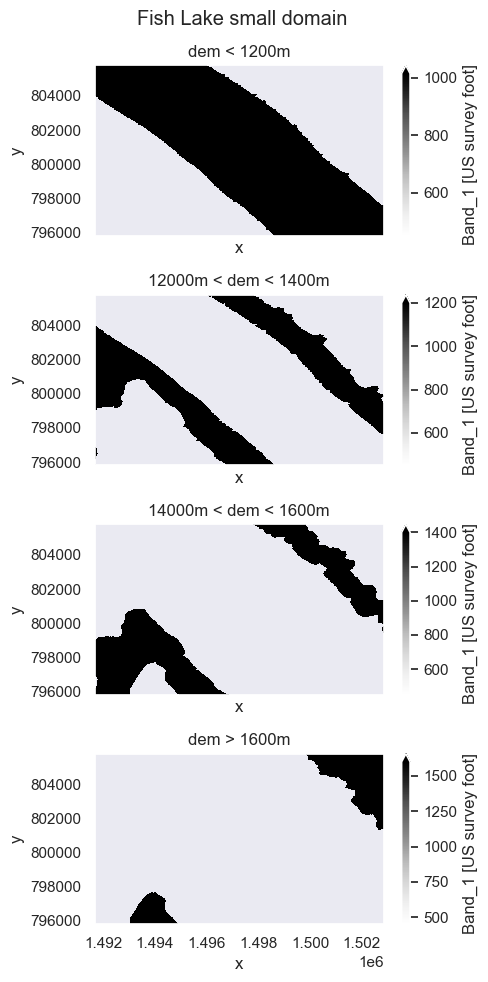

In [50]:
# f, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20,4)) # horizontal
f, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(5,10)) # verticle 

f.suptitle('Fish Lake small domain')

ds['bydem_1'].plot(ax=axes[0], cmap='Greys', vmax=500)
ds['bydem_2'].plot(ax=axes[1], cmap='Greys', vmax=500)
ds['bydem_3'].plot(ax=axes[2], cmap='Greys', vmax=500)
ds['bydem_4'].plot(ax=axes[3], cmap='Greys', vmax=500)

axes[0].set_title('dem < 1200m')
axes[1].set_title('12000m < dem < 1400m')
axes[2].set_title('14000m < dem < 1600m')
axes[3].set_title('dem > 1600m')

plt.tight_layout()